In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

import numpy as np
import tensorflow as tf
import pandas as pd
from collections import Counter
import csv, re, pickle

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data.csv',delimiter = ',',encoding='utf-8') 
del data['Unnamed: 8']
del data['Unnamed: 9']
del data['id']
del data['peer_username']
del data['peer_participants_count']
del data['date']
del data['type']
del data['views']


In [3]:
testData = pd.read_csv('data_test.csv',delimiter = ',',encoding='utf-8') 
# testData['text']

In [4]:
import seaborn as sns
sns.countplot(x='tag', data=data)

In [5]:
posts = []
labels = data['tag']
for i in data['text'] :
    posts.append(i)
lenTrainData = len(posts)
print(lenTrainData)

1186


In [6]:
#if you hava test data run this command

for i in testData['text'] :
    posts.append(i)
print(len(posts))

1386


In [7]:
words=[]
all_text = ''

for t in range (len(posts)):
    text = posts[t]
    text = text.replace('\u200c',' ')
    text = re.sub(r'[^آ-ی ]', ' ', text)
    all_text += text
    all_text += ' '
    wordsInText = text.split()
    for word in wordsInText:
        if word != ' ' or word != '':
            words.append(word)

In [8]:
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

In [11]:
with open("mySavedDict.txt", "wb") as myFile:
    pickle.dump(vocab_to_int, myFile)

In [13]:
post_ints = []
for each in posts:
#     print (each)
    each = each.replace('\u200c',' ')
    each = re.sub(r'[^آ-ی ]', ' ', each)
    post_ints.append([vocab_to_int[word] for word in each.split()])
len(post_ints)

1386

In [14]:
post_lens = Counter([len(x) for x in post_ints])
print("Zero-length post: {}".format(post_lens[0]))
print("Maximum post length: {}".format(max(post_lens)))

Zero-length post: 0
Maximum post length: 854


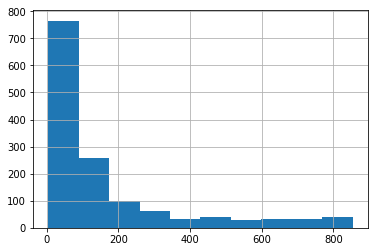

count    1386.000000
mean      159.943723
std       203.053701
min         4.000000
25%        31.000000
50%        74.000000
75%       180.750000
max       854.000000
dtype: float64

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in post_ints]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [16]:
seq_len = 800
features = np.zeros((len(posts), seq_len), dtype=int)
for i, row in enumerate(post_ints):
    features[i, -len(row):] = np.array(row)[:seq_len]


In [17]:
split_frac = 0.8
split_idx = int(lenTrainData*split_frac)
print("train number:",split_idx)
print("validation number:",lenTrainData - split_idx)
train_x, val_x = features[:split_idx], features[split_idx:lenTrainData]
train_y, val_y = labels[:split_idx], labels[split_idx:lenTrainData]

train number: 948
validation number: 238


In [18]:
#if you hava test data run this command
test_x = features[lenTrainData:]
len(test_x)

200

In [19]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

print('Build model...')
batch_size = 150
model = Sequential()
model.add(Embedding(20000, 256))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(train_x, train_y,
          batch_size=batch_size,
          epochs=8,
          validation_data=(val_x, val_y))
score, acc = model.evaluate(val_x, val_y,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train...
Instructions for updating:
Use tf.cast instead.
Train on 948 samples, validate on 238 samples
Epoch 1/8
948/948 [==============================] - 84s 88ms/step - loss: 0.6902 - acc: 0.5992 - val_loss: nan - val_acc: 0.7395
Epoch 2/8
948/948 [==============================] - 25s 26ms/step - loss: 0.6581 - acc: 0.6635 - val_loss: nan - val_acc: 0.7269
Epoch 3/8
948/948 [==============================] - 24s 25ms/step - loss: 0.5341 - acc: 0.7205 - val_loss: nan - val_acc: 0.5924
Epoch 4/8
948/948 [==============================] - 23s 25ms/step - loss: 0.3754 - acc: 0.8217 - val_loss: nan - val_acc: 0.7185
Epoch 5/8
948/948 [==============================] - 26s 27ms/step - loss: 0.0969 - acc: 0.8681 - val_loss: nan - val_acc: 0.7059
Epoch 6/8
948/948 [==========================

In [20]:
pred = model.predict(test_x)

In [21]:
y_pred = []
testLabels = testData['tag']
for i in pred :
    if(i>0.5 ): 
        y_pred.append(1)
    if((i<0.5) and (i>-0.5 )): 
        y_pred.append(0)
    if(i<-0.5): 
        y_pred.append(-1)
y_pred

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1]

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testLabels, y_pred, labels=[0,1,-1])

array([[ 28,  33,   0],
       [ 15, 113,   0],
       [ 11,   0,   0]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(testLabels, y_pred)

0.705

In [73]:
# result = {'text' : test_x , 'tag':y_pred}
# result['text'] = test_x
# result['tag'] = y_pred

list_of_tuples = list(zip(testData['text'], y_pred)) 
df = pd.DataFrame(list_of_tuples, columns = ['text', 'tag']) 
df.to_csv('test.csv', sep='^', quotechar='"')

In [82]:
pred[101]

array([0.9332708], dtype=float32)